[(0, '00'), (251, '01'), (499, '02'), (749, '03'), (999, '04'), (1249, '05'), (1499, '06'), (1749, '07'), (2000, '08'), (2251, '09'), (2501, '10'), (2753, '11'), (3003, '12'), (3253, '13'), (3503, '14'), (3753, '15'), (4004, '16'), (4254, '17'), (4505, '18'), (4754, '19'), (5004, '20'), (5255, '21'), (5506, '22')]


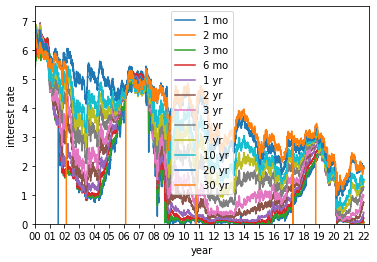

In [1]:
import requests
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

def grab_year(year):
    url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year='
    url_year = url + str(year)
    raw_html = requests.get(url_year).content
    df = pd.read_html(raw_html)[1]
    return df

def scrape():
    data = [ grab_year(i) for i in range(2000,2022) ]
    with open('data.p', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_data(fn):
    with open(fn, 'rb') as f:
        return pickle.load(f)
    
def get_date_changes(dates):
    # Returns a list of tuples from the dataframe dates column
    # The tuple will be [index of change, last two digits of year]
    #   The type will be a List[int, string]
    # Remember to include the start and end years
    changes = []
    beginDate = ''
    ##look at the last two digits and when they change recrd the index
    for index, date in enumerate(dates):
        currentDate = date[-2:]
        if(currentDate != beginDate): 
            changes.append((index, date[-2:]))
            ##print((index, date[-2:]))
            beginDate = currentDate
        if(currentDate == '22'):
            changes.append((index, currentDate))
    #add the last index.
    changes.append((len(dates), '22'))
    return changes
        
    
    
def plot_data(cols, r):
    # Plot each of the columns in a loop using plt
    # Add the column name as a label
    #print(cols)
    #print(r)
    for col in cols:
        if col != 'Date':
        #plt.ylabel(col)
        #print('printing')
        #print(r['Date'])
            plt.plot(r['Date'], r[col], label=col)
    #plt.show()

def plot_finalize(dc, r):
    # Turn the grid on
    plt.grid
    
    #set x and y labels
    plt.xlabel('year')
    plt.ylabel('interest rate')
    
    # Set the xticks to the values from the date changes variable
    # Set x ticks to be every 1
    xtickMarks = []
    xtickLabels = []
    for change in dc:
        xtickMarks.append(change[0])
        xtickLabels.append(change[1])
    plt.xticks(xtickMarks, xtickLabels)
    
    # Set the axis range to be reasonable
    #Lower left should be the origin
    ##5600 is 250 * 22 which is all of the data points.
    plt.xlim([0, 5600])
    ##this is just from looking at the chart
    plt.ylim([0, 7.5])

    # Show the legend
    plt.legend()

    # Save (for submitting)
    plt.savefig('Assignment1.png')


def wrangle():
    data = load_data('data.p')
    # Concatenate data frames and set NaN values to -1 with fillna
    r = pd.concat(data).fillna(-1)
    # Get column names
    cols = data[0].columns
    # Get times the year changed
    dc = get_date_changes(r[cols[0]].values)
    #print(dc)
    # Plot 
    plot_data(cols, r)
    plot_finalize(dc, r)

    # Visually cross verify the 30 yr with the following link
    # https://www.macrotrends.net/2521/30-year-treasury-bond-rate-yield-chart

if __name__ == "__main__":
    #scrape()
    wrangle()
